<a href="https://colab.research.google.com/github/ritam-sarkar/ml-practice/blob/main/Autoencoder__gray_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [45]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0   # Normalize to [0,1]
x_test = x_test.astype('float32') / 255.0

In [46]:
x_train = x_train.reshape((len(x_train), 28*28))
x_test = x_test.reshape((len(x_test), 28*28))


In [48]:
input_img = Input(shape=(28*28,))

# Encoder
encoded = Dense(2, activation='relu')(input_img)  # latent space (64-dim)

# Decoder
decoded = Dense(28*28, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='mse')

In [49]:
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# 5️⃣ Encode & Decode some test images
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

# Decoder model to reconstruct from latent space
encoded_input = Input(shape=(2,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

decoded_imgs = decoder.predict(encoded_imgs)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1579 - val_loss: 0.0717
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0705 - val_loss: 0.0664
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0653 - val_loss: 0.0629
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0626 - val_loss: 0.0617
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0617 - val_loss: 0.0609
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0609 - val_loss: 0.0602
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0602 - val_loss: 0.0597
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0598 - val_loss: 0.0592
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0592 - val_loss: 0.0588
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0589 - val_loss: 0.0585
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [51]:
print(x_train.shape)
print(encoded_imgs.shape)
print(decoded_imgs.shape)

print(y_test.shape)


(60000, 784)
(10000, 2)
(10000, 784)
(10000,)


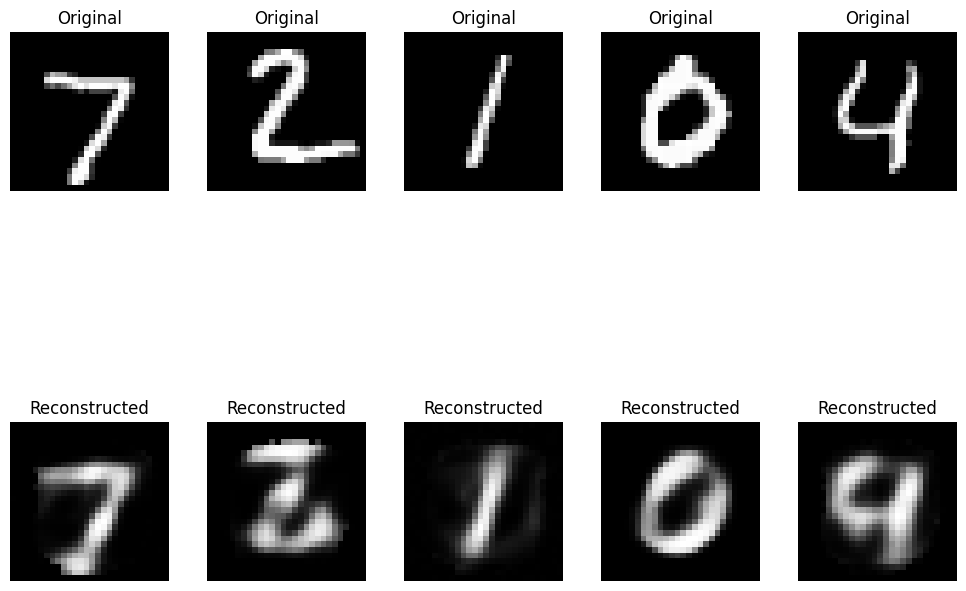

In [38]:
n = 5
plt.figure(figsize=(10,6))
for i in range(n):
    # 1️⃣ Original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')


    # 3️⃣ Reconstructed
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Here we plot the 2 dimenstional latent space , we can notice the numbers are clustered , I create 10 dimensional space , then numbers would have cluster properly

In [53]:
unique, counts = np.unique(y_test, return_counts=True)

for label, count in zip(unique, counts):
    print(f"Label {label}: {count} samples")

Label 0: 980 samples
Label 1: 1135 samples
Label 2: 1032 samples
Label 3: 1010 samples
Label 4: 982 samples
Label 5: 892 samples
Label 6: 958 samples
Label 7: 1028 samples
Label 8: 974 samples
Label 9: 1009 samples


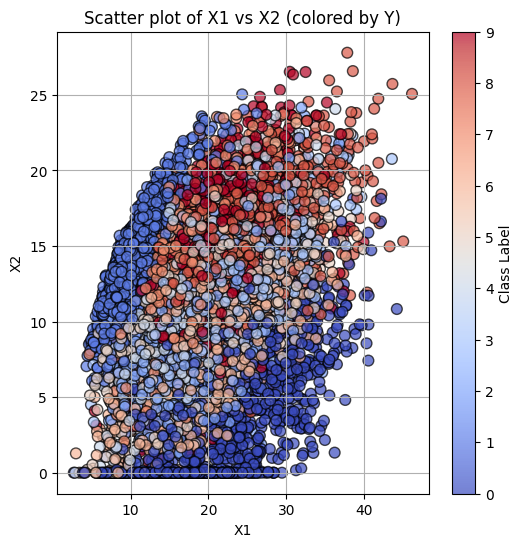

In [52]:
plt.figure(figsize=(6,6))
plt.scatter(encoded_imgs[:,0], encoded_imgs[:,1], c=y_test, cmap='coolwarm', s=60, edgecolors='k', alpha=0.7)

plt.title("Scatter plot of X1 vs X2 (colored by Y)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.colorbar(label='Class Label')
plt.show()